### <font color="Red" size="6"> Problema 3</font>
##***Calcular la probabilidad de que el proyecto perciba ganancias $\mathbb{P}(\Pi \geq 0|\,x).$ cual debería ser la política $x_{\epsilon}$ tal que se tenga una alta probabilidad $1-\epsilon$ de generar ganancias en el proyecto?***

In [ ]:
!pip install pyomo

     |████████████████████████████████| 9.5MB 548kB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 256kB 17.1MB/s 
     |████████████████████████████████| 163kB 15.9MB/s 


In [ ]:
!pip install astroML

     |████████████████████████████████| 112kB 6.1MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp37-none-any.whl size=128664 sha256=9e499c3181e1ab4763d9f24cb41a026b43c2476372b9b06fb76d9508bb56d926
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyomo.environ as pyo
from pyomo.opt import SolverStatus,TerminationCondition
import random
from scipy.stats import weibull_min, expon
import seaborn as sns
sns.set_theme()

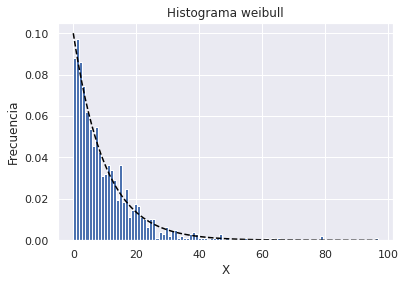

In [ ]:
# Histograma de números Aleatorios Exponencial
k=1
lamb=10
num_bins = 100
samples = 1000
rv_energy = lamb*np.random.weibull(k, samples)
c, bins, _ = plt.hist(rv_energy, num_bins, density=1)

y = ((k/lamb)*(bins/lamb)**(k - 1)*np.exp(-(bins/lamb)**k))

plt.plot(bins, y, '--', color ='black') 
plt.ylabel('Frecuencia')
plt.xlabel('X')
plt.title('Histograma weibull')
plt.show()

### *Luego de despejar las ecuaciones para los límites máximos y minimos de energía, las expresiones son las siguientes:*

### <center> $E^{min} = \frac{xr^{-}}{\frac{LCOE}{P_{x}} + (r^{-} - 1)}$ 

### <center> $E^{max} = \frac{xr^{+}}{(r^{+}+1) - \frac{LCOE}{P_{x}}}$ 

### *Se calculará $\,\mathbb{P}(\Pi\geq 0, x) $ que se compone de la siguiente manera:*

### <center> $ \,\mathbb{P}(E^{min} \leq E \leq E^{max})$

### *La energía se comporta conforma a una distribución Weibull($\lambda, k=1$}, donde su pdf (Probability distribution function) es:*

### <center> $f_{E}(e) = (\frac{k}{\lambda})(\frac{e}{\lambda})^{k-1}e^{-(\frac{e}{\lambda})^{k}} \,\,\, e\geq0$ 

### *Y su cdf (Cumulative distribution function) es:*
$$F_{E}(e) = 
\begin{cases}
  0, \, \, \, \, \quad \quad \quad e\leq 0, \\
  1 - e^{-\alpha e}\quad e\geq 0.
\end{cases}$$

### *Organizando la expresión para determinar las probabilidades se tiene:*

### <center> *$\mathbb{P}(\Pi,x \geq 0) = e^{-\alpha E^{max}} - e^{-\alpha E^{min}}$*




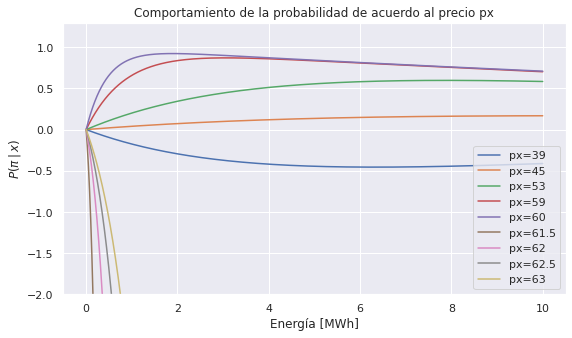

In [ ]:
LCOE = 42.8
e = 0.1
rplus = 0.15
rminus = 0.3
px = [39, 45, 53, 59, 60, 61.5, 62, 62.5, 63]
samples = 1000
k = 1
lambd = 10
alpha = (1/lamb)
probability = []
# rv_energy = lamb*np.random.weibull(k, samples)
energy = np.arange(0, 10, 0.0001)
v = {}

plt.figure(figsize=(9,5))

for p in px:
    probability = []
    v[str(p)] = []
    for x in energy:
        Femin = np.exp(-alpha*(rminus*x/((LCOE/p) - (1-rminus))))
        Femax = np.exp(-alpha*(rplus*x/((1+rplus) - (LCOE/p))))

        # emin = (rminus*x/((LCOE/px) - (1-rminus)))
        # emax = (rplus*x/((1+rplus) - (LCOE/px)))
        # prob1 = weibull_min.cdf(emin, k, loc=0, scale=lamb)
        # prob2 = weibull_min.cdf(emax, k, loc=0, scale=lamb)

        probability.append(Femax - Femin)

        if Femax - Femin >= 1 - e:
            v[str(p)].append(x)

        # probability.append(prob2 - prob1)
    
    plt.plot(energy, probability, label=f"px={p}")
    plt.xlabel("Energía [MWh]")
    plt.title("Comportamiento de la probabilidad de acuerdo al precio px")
    # plt.scatter([min(v[str(p)]), max(v[str(p)])], [1-e, 1-e])
    plt.ylim(-2, 1.3)
    plt.legend()
    plt.ylabel(r'$P(\pi\,|\,x)$')

### *Luego lo que se va hacer es calcular $x_{\epsilon}$ que serían los valores de energía para los cuales se cumple que $\mathbb{P}(\Pi \geq 0|\, x_{\epsilon}) = 1 - \epsilon$*



In [ ]:
for p in px:
    if len(v[str(p)]) == 0:
        continue
    else:
        mx, mn = max(v[str(p)]), min(v[str(p)])
        print(f"Para un precio de {p}, se tiene valores de Emin de {mn} y Emax de {mx}")

Para un precio de 60, se tiene valores de Emin de 1.2711000000000001 y Emax de 3.0319000000000003


### *$\mathbb{P}(\Pi \geq 0\,|\, x_{\epsilon}) = \mathbb{P}(E^{min} \leq E \leq E^{max}) = 1 - \epsilon$*

### *Esta probabilidad se da para valores de energía de:*

### <center> $1.2711 \leq x_{\epsilon} \leq 3.0319$ 

### *Cómo se puede apreciar al varias los precios del contrato, siempre que esta por debajo del LCOE se tendrá que $\mathbb{P}(\Pi \geq 0, x) = 0$, es decir no se percibirán nunca ganancias.*

### *Se observó por ejemplo que hay un límite máximo de px al cual $\mathbb{P}(\Pi \geq 0, x_{\epsilon}) = 1-\epsilon$ \, se hace a un valor por encima del LCOE de px=$60\$$ por ejemplo si px=$61.5\$$ puede verse en la gráfica anterior que la probabilidad $\mathbb{P}$ ya empieza a ser 0.*

### <font color="Red" size="6"> Problema 4</font>
##***Emplee el solver de su preferencia para calcular la solución óptima del problema # 2 y su utilidad correspondiente esperada eligiendo un número relativamente alto de muestras de la variable aleatoria de energía producida para una distribución Weibull(10, 1).***

### *Asumiendo una distribución de Weibull para la energía E~$Weibull{\lambda, k=1}$*

### *Se va calcular el valor esperado de las utilidades $\mathbb{E}(\Pi|x^{*})$, quedará en función de $r^{-}, r^{+}, p_{x}$ y el LCOE*

### *Un caso particular de la Weibull cuando su parámetro de forma es 1, se convierte en una distribución exponencial cuya pdf es:*

$$F_{E}(e) = 
\begin{cases}
  1 - e^{-\alpha e}\quad e\geq 0, \\
  0, \,\,\,\, \quad \quad \quad e \leq 0,
\end{cases}$$

### *Como vimos de la tarea anterior, el valor esperado $\mathbb{E}$ de la distribución es:*

### <center> $\mathbb{E}(E) = \frac{1}{\alpha}$


### *Tenemos la ecuación que describe las ganancias:*

### <center> $\Pi(x|E) = xp_{x} - LCOE\cdot E - (1+r^{+})p_{x}(x-E)_{+} + (1-r^{-})p_{x}(E-x)_{+}$

### *Se particiona en 2 ecuaciones, de acuerdo a las 2 rectas que se estan cruzando allí, se tiene para cuando $x \geq E$*

### <center> *$(1 + r^{+})p_{x}E - xr^{+}p_{x} - LCOE\cdot E = prof_{1}$*

### *Para cuando $x \leq E$*

### <center> *$(1 - r^{-})p_{x}E + xr^{-}p_{x} - LCOE\cdot E = prof_{2}$*




In [ ]:
model = pyo.ConcreteModel()
# model.k = pyo.Set(initialize=list(range(samples)))

k=1
samples=10000
lamb=10
LCOE = 42.8
rplus = 0.15
rminus = 0.3
px = 62

rv_energy = lamb*np.random.weibull(k, samples)
count, bins, _ = plt.hist(rv_energy, samples)
plt.close()
pmf_energy = count/len(rv_energy)
OptX = lamb*np.log((rplus + rminus)/rplus)

# Conjuntos
model.E = pyo.Set(initialize=list(range(len(rv_energy))), 
                  doc="Observaciones de energía")
# Parametros
toInit = {i: rv_energy[i] for i in model.E}
model.e = pyo.Param(model.E, initialize=toInit, within=pyo.Reals, doc="Energía")
model.px = pyo.Param(initialize=px, within=pyo.Reals)
model.rplus = pyo.Param(initialize=rplus, within=pyo.Reals)
model.rminus = pyo.Param(initialize=rminus, within=pyo.Reals)
model.LCOE = pyo.Param(initialize=LCOE, within=pyo.Reals)
model.probE = pyo.Param(model.E, initialize={i: pmf_energy[i] for i in model.E})

# Variables
model.prof = pyo.Var(model.E, doc="ganancias según el valor de energía")


def objective(model):
    return sum(model.prof[e] for e in model.E)
model.obj = pyo.Objective(rule=objective, sense=pyo.maximize)

def constraint1(model, e):
    return model.prof[e] <= model.probE[e]*(-rplus*px*OptX + (1 + rplus)*px*model.e[e] - LCOE*model.e[e])
model.con1 = pyo.Constraint(model.E, rule=constraint1)

def constraint2(model, e):
    return model.prof[e] <= model.probE[e]*(rminus*px*OptX + (1 - rminus)*px*model.e[e] - LCOE*model.e[e])
model.con2 = pyo.Constraint(model.E, rule=constraint2)

In [ ]:
# instal cbc
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 160980 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [ ]:
# Chequear la solución
opt = pyo.SolverFactory("cbc", executable='/usr/bin/cbc')
results = opt.solve(model)  

# Verificación de status
if (results.solver.status == SolverStatus.ok) and \
        (results.solver.termination_condition == TerminationCondition.optimal):
    print("Solución óptima ")
    print(str(results.solver)) 
elif results.solver.termination_condition == TerminationCondition.infeasible:
    print("Algo está mal..")
else:
    # algo esta mal 
    print(str(results.solver)) 

Solución óptima 

- Status: ok
  User time: -1.0
  System time: 0.14
  Wallclock time: 0.17
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 0
  Error rc: 0
  Time: 0.20229578018188477



In [ ]:
print(f"El valor esperado E de las ganancias es: {model.obj.expr()}$")

El valor esperado E de las ganancias es: 85.05895006882903$


In [ ]:
print(f"Energía contratada x: {OptX} MWh")

Energía contratada x: 10.986122886681098 MWh


### *Probaremos con la fórmula encontrada teoricamente en el punto 2:*

### <center> $E|\Pi, x^{*}| = p_{x}\lambda(1-r^{+}ln(\frac{r^{+} + r^{-}}{r^{+}})) - LCOE\cdot\lambda $

In [ ]:
Egan = px*lamb*(1 - rplus*np.log((rplus + rminus)/rplus)) - LCOE*lamb
print(f"Valor esperado teórico es: {Egan}$/MWh")

Valor esperado teórico es: 89.82905715386585$/MWh
